In [1]:
# Historical snapshot of coins from December 01, 2019: https://coinmarketcap.com/historical/20191201/ used to
# get a representative set of coins from before the period of analysis to avoid look-ahead bias.

strat_7_univ = [
    'BTCUSDT', 'ETHUSDT', 'XRPUSDT', 'BCHUSDT', 'LTCUSDT', 'EOSUSDT', 'BNBUSDT',
    'XLMUSDT', 'TRXUSDT', 'ADAUSDT', 'XTZUSDT', 'LINKUSDT', 'ATOMUSDT',
    'NEOUSDT', 'MKRUSDT', 'DASHUSDT', 'ETCUSDT', 'USDCUSDT', 'ONTUSDT', 'VETUSDT',
    'DOGEUSDT', 'BATUSDT', 'ZECUSDT',
    'SNXUSDT', 'QTUMUSDT', 'TUSDUSDT', 'ZRXUSDT',
    'THXUSDT', 'THRUSDT', 'ALGOUSDT', 'REPUSDT', 'NANOUSDT', 'KBCUSDT', 'BTGUSDT', 'RVNUSDT', 'OMGUSDT',
    'CNXUSDT', 'ABBCUSDT', 'XINUSDT', 'VSYSUSDT', 'SEELEUSDT', 'EONUSDT', 'ZBUSDT', 'EKTUSDT', 'DGBUSDT',
    'BTMUSDT', 'LSKUSDT', 'KMDUSDT', 'SAIUSDT', 'LUNAUSDT', 'KCSUSDT', 'FTTUSDT', 'QNTUSDT', 'SXPUSDT',
    'BDXUSDT', 'GAPUSDT', 'BCDUSDT', 'THETAUSDT', 'ICXUSDT', 'FSTUSDT', 'MATICUSDT', 'SCUSDT', 'EVRUSDT',
    'BTTUSDT', 'MOFUSDT', 'IOSTUSDT', 'MCOUSDT', 'WAVESUSDT', 'XVGUSDT', 'MONAUSDT', 'BTSUSDT', 'BCNUSDT',
    'HCUSDT', 'MAIDUSDT', 'NEXOUSDT', 'ARDRUSDT', 'DXUSDT', 'OKBUSDT', 'FXCUSDT', 'RLCUSDT', 'MBUSDT',
    'BXKUSDT', 'AEUSDT', 'ENJUSDT', 'STEEMUSDT', 'SLVUSDT', 'BRZEUSDT', 'ZILUSDT', 'VESTUSDT', 'ZENUSDT',
    'SOLVEUSDT', 'CHZUSDT', 'NOAHUSDT', 'LAUSDT', 'BTMXUSDT', 'ETNUSDT', 'ENGUSDT', 'ILCUSDT', 'NPXSUSDT',
    'CRPTUSDT', 'GNTUSDT', 'SNTUSDT', 'ELFUSDT', 'JWLUSDT', 'FETUSDT', 'BOTXUSDT', 'NRGUSDT', 'DGDUSDT',
    'EXMRUSDT', 'EURSUSDT', 'AOAUSDT', 'RIFUSDT', 'CIX100USDT', 'BFUSDT', 'XZCUSDT', 'FABUSDT', 'GRINUSDT',
    'NETUSDT', 'VERIUSDT', 'DGTXUSDT', 'KNCUSDT', 'RENUSDT', 'STRATUSDT', 'ETPUSDT', 'NEXUSDT', 'NEWUSDT',
    'BCZEROUSDT', 'GXCUSDT', 'TNTUSDT', 'BTC2USDT', 'PPTUSDT', 'USDKUSDT', 'ELAUSDT', 'IGNISUSDT', 'PLCUSDT',
    'BNKUSDT', 'DTRUSDT', 'RCNUSDT', 'HPTUSDT', 'LAMBUSDT', 'MANAUSDT', 'EDCUSDT', 'BEAMUSDT', 'TTUSDT',
    'AIONUSDT', 'BZUSDT', 'WTCUSDT', 'WICCUSDT', 'LRCUSDT', 'BRDUSDT', 'FCTUSDT', 'NULSUSDT', 'FTMUSDT',
    'IOTXUSDT', 'QBITUSDT', 'XMXUSDT', 'YOUUSDT', 'NASUSDT', 'WAXPUSDT', 'ARKUSDT', 'RDDUSDT', 'GNYUSDT',
    'AGVCUSDT', 'HYNUSDT', 'CVCUSDT', 'WANUSDT', 'WINUSDT', 'LINAUSDT', 'RUSDT', 'PAIUSDT', 'FSNUSDT',
    'FUNUSDT', 'DPTUSDT', 'BHDUSDT', 'LOOMUSDT', 'XACUSDT', 'BUSDUSDT', 'BHPUSDT', 'TRUEUSDT', 'LOKIUSDT',
    'QASHUSDT', 'BNTUSDT', 'DOTUSDT', 'SOLUSDT']

## Load And Structure Data

In [2]:
from binance.client import Client as bnb_client
from binance.client import BinanceAPIException
from datetime import datetime
import pandas as pd

client = bnb_client(tld='US')

def get_price_data_for_coin(coin, freq, start_date):
    bn_data = client.get_historical_klines(coin, freq, start_date)
    columns = ['open_time','open','high','low','close','volume','close_time','quote_volume',
        'num_trades','taker_base_volume','taker_quote_volume','ignore']

    bn_data = pd.DataFrame(bn_data, columns=columns)
    bn_data['open_time'] = bn_data['open_time'].map(lambda x: datetime.utcfromtimestamp(x / 1000))
    bn_data['close_time'] = bn_data['close_time'].map(lambda x: datetime.utcfromtimestamp(x / 1000))
    return bn_data


def get_price_data_for_universe(freq, start_date):
    px_data = {}

    for coin in strat_7_univ:
        try:
            px_data[coin] = get_price_data_for_coin(coin, freq, start_date).set_index('open_time')
            print(f"Downloaded data for {coin}.")
        except BinanceAPIException:
            print(f"Couldn't load data for {coin}.")
    
    return px_data

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [3]:
data_freq = '1d'
look_back_window_size = 30
look_back_min_periods = 10
start_datetime = '2020-01-01'
in_sample_end = pd.to_datetime("2022-12-31")
out_sample_start = pd.to_datetime("2023-01-01")

px_data = get_price_data_for_universe(data_freq, start_datetime)

Downloaded data for BTCUSDT.
Downloaded data for ETHUSDT.
Downloaded data for XRPUSDT.
Downloaded data for BCHUSDT.
Downloaded data for LTCUSDT.
Downloaded data for EOSUSDT.
Downloaded data for BNBUSDT.
Downloaded data for XLMUSDT.
Downloaded data for TRXUSDT.
Downloaded data for ADAUSDT.
Downloaded data for XTZUSDT.
Downloaded data for LINKUSDT.
Downloaded data for ATOMUSDT.
Downloaded data for NEOUSDT.
Downloaded data for MKRUSDT.
Downloaded data for DASHUSDT.
Downloaded data for ETCUSDT.
Downloaded data for USDCUSDT.
Downloaded data for ONTUSDT.
Downloaded data for VETUSDT.
Downloaded data for DOGEUSDT.
Downloaded data for BATUSDT.
Downloaded data for ZECUSDT.
Downloaded data for SNXUSDT.
Downloaded data for QTUMUSDT.
Downloaded data for TUSDUSDT.
Downloaded data for ZRXUSDT.
Couldn't load data for THXUSDT.
Couldn't load data for THRUSDT.
Downloaded data for ALGOUSDT.
Couldn't load data for REPUSDT.
Couldn't load data for NANOUSDT.
Couldn't load data for KBCUSDT.
Couldn't load data 

In [4]:
px_close = {coin: px_data[coin]["close"] for coin in px_data}
px_close = pd.DataFrame(px_close)
px_close.index.rename("date", inplace=True)
px_close = px_close.astype(float)

px_close

,BTCUSDT,ETHUSDT,XRPUSDT,BCHUSDT,LTCUSDT,EOSUSDT,BNBUSDT,XLMUSDT,TRXUSDT,ADAUSDT,...,MANAUSDT,LRCUSDT,FTMUSDT,IOTXUSDT,WAXPUSDT,LOOMUSDT,BUSDUSDT,BNTUSDT,DOTUSDT,SOLUSDT
date,,,,,,,,,,,,,,,,,,,,,
2020-01-01,7195.65,130.52,0.19301,204.31,41.53,NaN,13.6954,0.04525,NaN,0.03346,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-02,6961.80,127.22,0.18762,195.41,39.44,NaN,13.0225,0.04363,NaN,0.03272,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,7345.65,133.95,0.19320,222.70,42.05,NaN,13.6231,0.04566,NaN,0.03403,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-04,7349.45,134.02,0.19277,224.25,42.58,NaN,13.7944,0.04574,NaN,0.03441,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-05,7364.19,135.23,0.19462,223.29,43.26,NaN,14.0368,0.04543,NaN,0.03455,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-01-17,104151.35,3474.23,3.28970,490.00,136.99,0.9954,721.2500,0.48780,NaN,1.13220,...,0.5611,0.2115,0.7837,0.04782,0.04428,0.06194,NaN,0.699,7.491,219.64
2025-01-18,104499.99,3307.76,3.27670,465.20,125.76,0.9284,710.5000,0.49130,NaN,1.10220,...,0.5189,0.1942,0.6827,0.04657,0.04657,0.06007,NaN,0.664,6.957,261.56
2025-01-19,101032.19,3220.82,2.96720,428.80,115.67,0.8146,685.6900,0.43250,NaN,0.99430,...,0.4589,0.1713,0.5800,0.04530,0.04067,0.05916,NaN,0.752,6.254,253.54


In [5]:
px_close_in_sample = px_close.loc[:in_sample_end]
px_close_out_sample = px_close.loc[out_sample_start:]
px_close_out_sample

,BTCUSDT,ETHUSDT,XRPUSDT,BCHUSDT,LTCUSDT,EOSUSDT,BNBUSDT,XLMUSDT,TRXUSDT,ADAUSDT,...,MANAUSDT,LRCUSDT,FTMUSDT,IOTXUSDT,WAXPUSDT,LOOMUSDT,BUSDUSDT,BNTUSDT,DOTUSDT,SOLUSDT
date,,,,,,,,,,,,,,,,,,,,,
2023-01-01,16617.57,1199.97,NaN,96.70,70.69,0.8750,244.1924,0.07251,0.05490,0.24989,...,0.2987,0.1892,0.2019,NaN,0.04220,NaN,1.0006,0.375,4.380,9.9994
2023-01-02,16677.87,1214.05,NaN,99.52,74.80,0.8840,245.2174,0.07372,0.05520,0.25336,...,0.3112,0.1933,0.2106,NaN,0.04270,NaN,1.0003,0.358,4.510,11.2914
2023-01-03,16674.12,1214.68,NaN,99.47,75.52,0.8700,246.0136,0.07377,0.05483,0.25297,...,0.3095,0.1923,0.2145,NaN,0.04250,NaN,1.0005,0.348,4.520,13.3944
2023-01-04,16849.97,1256.89,NaN,101.56,75.46,0.9110,259.2094,0.07374,0.05469,0.26796,...,0.3203,0.1961,0.2183,NaN,0.04360,NaN,1.0002,0.351,4.590,13.4225
2023-01-05,16832.48,1251.03,NaN,100.98,74.06,0.8920,256.5466,0.07286,0.05356,0.26891,...,0.3193,0.1971,0.2161,NaN,0.04360,NaN,1.0003,0.346,4.630,13.4253
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-01-17,104151.35,3474.23,3.2897,490.00,136.99,0.9954,721.2500,0.48780,NaN,1.13220,...,0.5611,0.2115,0.7837,0.04782,0.04428,0.06194,NaN,0.699,7.491,219.6400
2025-01-18,104499.99,3307.76,3.2767,465.20,125.76,0.9284,710.5000,0.49130,NaN,1.10220,...,0.5189,0.1942,0.6827,0.04657,0.04657,0.06007,NaN,0.664,6.957,261.5600
2025-01-19,101032.19,3220.82,2.9672,428.80,115.67,0.8146,685.6900,0.43250,NaN,0.99430,...,0.4589,0.1713,0.5800,0.04530,0.04067,0.05916,NaN,0.752,6.254,253.5400


## Pick Triples Of Correlated Coins

In [32]:
from collections import defaultdict

def get_high_corr_map(px_close_in_sample):
    corr_matrix = px_close_in_sample.corr()
    high_corr_map = defaultdict(list)

    for coin_a in corr_matrix.index:
        for coin_b in corr_matrix.index:
            if coin_a < coin_b and corr_matrix.loc[coin_a, coin_b] > 0.9:
                high_corr_map[coin_a].append((coin_b, corr_matrix.loc[coin_a, coin_b]))
                high_corr_map[coin_b].append((coin_a, corr_matrix.loc[coin_b, coin_a]))

    return corr_matrix, high_corr_map

corr_matrix, high_corr_map = get_high_corr_map(px_close_in_sample)
high_corr_map

defaultdict(list,
            {'BTCUSDT': [('EOSUSDT', 0.9348567122829038),
              ('ZECUSDT', 0.9428253617718525),
              ('OMGUSDT', 0.9802239695217831),
              ('LSKUSDT', 0.9215803168951613),
              ('QNTUSDT', 0.9166268336980311),
              ('ENJUSDT', 0.9554121826740358),
              ('MANAUSDT', 0.950361736167757),
              ('LRCUSDT', 0.9662414722573948),
              ('DOTUSDT', 0.9670176257944338),
              ('ALGOUSDT', 0.9045249135303184),
              ('BNTUSDT', 0.9663718682082543)],
             'EOSUSDT': [('BTCUSDT', 0.9348567122829038),
              ('BCHUSDT', 0.955758690597819),
              ('ETHUSDT', 0.9671546418402377),
              ('LTCUSDT', 0.9126247222510171),
              ('XLMUSDT', 0.9524772660659078),
              ('LINKUSDT', 0.9333499618602743),
              ('NEOUSDT', 0.9583566587519775),
              ('MKRUSDT', 0.9098844335606413),
              ('ONTUSDT', 0.9661497916742543),
              ('VE

In [33]:
def get_coins_with_hi_corr_mutual_lo_corr(corr_matrix, high_corr_map):
    coins_with_hi_corr_mutual_lo_corr = []

    for coin in high_corr_map:
        hi_corr_coins = list(map(lambda p: p[0], high_corr_map[coin]))
        for coin_a in hi_corr_coins:
            for coin_b in hi_corr_coins:
                if coin_a < coin_b and corr_matrix.loc[coin_a, coin_b] < 0.6:
                    coins_with_hi_corr_mutual_lo_corr.append((coin, coin_a, coin_b))

    return coins_with_hi_corr_mutual_lo_corr

coins_with_hi_corr_mutual_lo_corr = get_coins_with_hi_corr_mutual_lo_corr(corr_matrix, high_corr_map)
coins_with_hi_corr_mutual_lo_corr

[('EOSUSDT', 'BCHUSDT', 'ETHUSDT'),
 ('EOSUSDT', 'BCHUSDT', 'SOLUSDT'),
 ('EOSUSDT', 'BCHUSDT', 'BNBUSDT'),
 ('EOSUSDT', 'ETHUSDT', 'ONTUSDT'),
 ('EOSUSDT', 'LTCUSDT', 'SOLUSDT'),
 ('EOSUSDT', 'NEOUSDT', 'SOLUSDT'),
 ('EOSUSDT', 'MKRUSDT', 'SOLUSDT'),
 ('EOSUSDT', 'ONTUSDT', 'SOLUSDT'),
 ('EOSUSDT', 'SOLUSDT', 'XLMUSDT'),
 ('EOSUSDT', 'SOLUSDT', 'VETUSDT'),
 ('EOSUSDT', 'SOLUSDT', 'ZRXUSDT'),
 ('EOSUSDT', 'SOLUSDT', 'ZENUSDT'),
 ('EOSUSDT', 'BNBUSDT', 'ONTUSDT'),
 ('EOSUSDT', 'ADAUSDT', 'ONTUSDT'),
 ('EOSUSDT', 'ATOMUSDT', 'BCHUSDT'),
 ('EOSUSDT', 'ATOMUSDT', 'NEOUSDT'),
 ('EOSUSDT', 'ATOMUSDT', 'ONTUSDT'),
 ('EOSUSDT', 'ATOMUSDT', 'ZENUSDT'),
 ('ZECUSDT', 'ETHUSDT', 'ONTUSDT'),
 ('ZECUSDT', 'BCHUSDT', 'ETHUSDT'),
 ('OMGUSDT', 'ETHUSDT', 'ONTUSDT'),
 ('OMGUSDT', 'BCHUSDT', 'ETHUSDT'),
 ('OMGUSDT', 'BCHUSDT', 'BNBUSDT'),
 ('OMGUSDT', 'BCHUSDT', 'SOLUSDT'),
 ('OMGUSDT', 'LTCUSDT', 'QNTUSDT'),
 ('OMGUSDT', 'LTCUSDT', 'WAXPUSDT'),
 ('OMGUSDT', 'LTCUSDT', 'SOLUSDT'),
 ('OMGUSDT', 'BNBUSDT',

In [8]:
def get_max_corr_triple(coins_with_hi_corr_mutual_lo_corr, corr_matrix):
    max_corr_triple = None
    max_corr = -1.0
    for coin_triple in coins_with_hi_corr_mutual_lo_corr:
        corr_a = corr_matrix.loc[coin_triple[0], coin_triple[1]]
        corr_b = corr_matrix.loc[coin_triple[0], coin_triple[2]]
        if max_corr < max(corr_a, corr_b):
            max_corr_triple = coin_triple
            max_corr = max(corr_a, corr_b)
    
    coins_with_hi_corr_mutual_lo_corr.remove(max_corr_triple)
    return max_corr_triple

In [34]:
def get_triples_from_hi_corr_data(coins_with_hi_corr_mutual_lo_corr, corr_matrix):
    coins_in_a_triple = set()
    selected_triples = dict()

    while len(coins_with_hi_corr_mutual_lo_corr) > 0:
        max_corr_triple = get_max_corr_triple(
            coins_with_hi_corr_mutual_lo_corr, corr_matrix)
        for coin in max_corr_triple:
            if coin in coins_in_a_triple:
                break
        else:
            for coin in max_corr_triple:
                coins_in_a_triple.add(coin)
            selected_triples[max_corr_triple[0]] = (max_corr_triple[1], max_corr_triple[2])

    return selected_triples

selected_triples = get_triples_from_hi_corr_data(coins_with_hi_corr_mutual_lo_corr, corr_matrix)
selected_triples

{'OMGUSDT': ('ATOMUSDT', 'ZENUSDT'),
 'DOTUSDT': ('SOLUSDT', 'XLMUSDT'),
 'ZRXUSDT': ('LTCUSDT', 'WAXPUSDT'),
 'ENJUSDT': ('ADAUSDT', 'ONTUSDT'),
 'EOSUSDT': ('BCHUSDT', 'ETHUSDT'),
 'MANAUSDT': ('LSKUSDT', 'MKRUSDT'),
 'QNTUSDT': ('KNCUSDT', 'QTUMUSDT'),
 'NEOUSDT': ('DGBUSDT', 'LINKUSDT')}

In [35]:
len(selected_triples)

8

In [37]:
def get_selected_triples(px_close_in_sample):
    corr_matrix, high_corr_map = get_high_corr_map(px_close_in_sample)
    coins_with_hi_corr_mutual_lo_corr = get_coins_with_hi_corr_mutual_lo_corr(corr_matrix, high_corr_map)
    return get_triples_from_hi_corr_data(coins_with_hi_corr_mutual_lo_corr, corr_matrix)

selected_triples = get_selected_triples(px_close_in_sample)
selected_triples

{'OMGUSDT': ('ATOMUSDT', 'ZENUSDT'),
 'DOTUSDT': ('SOLUSDT', 'XLMUSDT'),
 'ZRXUSDT': ('LTCUSDT', 'WAXPUSDT'),
 'ENJUSDT': ('ADAUSDT', 'ONTUSDT'),
 'EOSUSDT': ('BCHUSDT', 'ETHUSDT'),
 'MANAUSDT': ('LSKUSDT', 'MKRUSDT'),
 'QNTUSDT': ('KNCUSDT', 'QTUMUSDT'),
 'NEOUSDT': ('DGBUSDT', 'LINKUSDT')}

## Determine trailing alpha, beta, and the residuals

In [40]:
import statsmodels.api as sm
from statsmodels.regression.rolling import RollingOLS

# px_ex = px_close[["OMGUSDT", "ATOMUSDT", "ZENUSDT"]]
# px_ex = sm.add_constant(px_ex)

# model = RollingOLS(
#     px_ex["OMGUSDT"], px_ex[["const", "ATOMUSDT", "ZENUSDT"]], window=30, min_nobs=20, expanding=True)


# # rolling_px_ex = px_ex.rolling(window=30, min_periods=1)

# # model = sm.OLS(rolling_px_ex["OMGUSDT"], rolling_px_ex[["ATOMUSDT", "ZENUSDT"]])
# results = model.fit(params_only=True)

def get_triples_rolling_alpha_beta(dependent_coin, independent_coin_1, independent_coin_2,
                                   interval, min_num_observations):
    px_ex = px_close[[dependent_coin, independent_coin_1, independent_coin_2]][:]
    px_ex = sm.add_constant(px_ex)

    model = RollingOLS(
        px_ex[dependent_coin], px_ex[["const", independent_coin_1, independent_coin_2]],
        window=interval, min_nobs=min_num_observations, expanding=True)
    return model.fit(params_only=True)
    
# look_back_window_size = 30
# look_back_min_periods = 10
results = get_triples_rolling_alpha_beta("OMGUSDT", "ATOMUSDT", "ZENUSDT",
                                         look_back_window_size, look_back_min_periods)

In [41]:
results.params

,const,ATOMUSDT,ZENUSDT
date,,,
2020-01-01,NaN,NaN,NaN
2020-01-02,NaN,NaN,NaN
2020-01-03,NaN,NaN,NaN
2020-01-04,NaN,NaN,NaN
2020-01-05,NaN,NaN,NaN
...,...,...,...
2025-01-17,NaN,NaN,NaN
2025-01-18,NaN,NaN,NaN
2025-01-19,NaN,NaN,NaN


In [14]:
results.params.loc["2023-01-01"]

const       0.269381
ATOMUSDT   -0.044214
ZENUSDT     0.129085
Name: 2023-01-01 00:00:00, dtype: float64

<Axes: xlabel='date'>

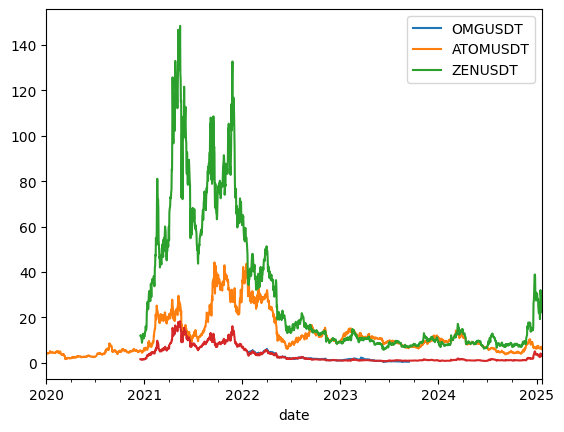

In [15]:
px_ex_data = px_close[["OMGUSDT", "ATOMUSDT", "ZENUSDT"]]
fixed_params = results.params.loc["2023-01-01"]

est = fixed_params["const"] + fixed_params["ATOMUSDT"] * px_ex_data["ATOMUSDT"] + fixed_params["ZENUSDT"] * px_ex_data["ZENUSDT"]

px_ex_data.plot()
est.plot()

<Axes: xlabel='date'>

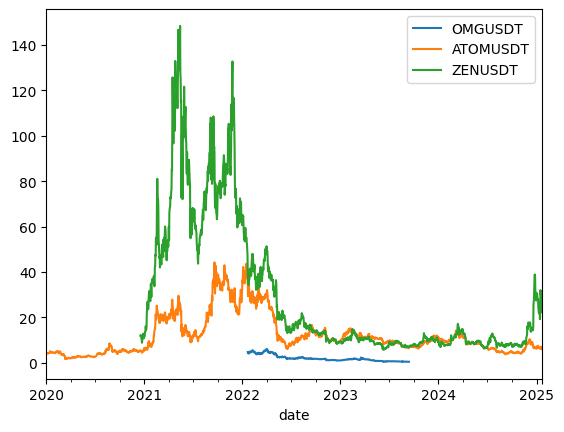

In [16]:
px_ex_data.plot()

In [17]:
# 'OMGUSDT': ('ATOMUSDT', 'ZENUSDT')

beta_coeffs = results.params[["ATOMUSDT", "ZENUSDT"]][:]
beta_coeffs

,ATOMUSDT,ZENUSDT
date,,
2020-01-01,NaN,NaN
2020-01-02,NaN,NaN
2020-01-03,NaN,NaN
2020-01-04,NaN,NaN
2020-01-05,NaN,NaN
...,...,...
2025-01-17,NaN,NaN
2025-01-18,NaN,NaN
2025-01-19,NaN,NaN


In [18]:
alpha_coeffs = results.params[["const"]][:]
alpha_coeffs.rename({"const": "OMGUSDT"}, axis=1, inplace=True)
alpha_coeffs

,OMGUSDT
date,
2020-01-01,NaN
2020-01-02,NaN
2020-01-03,NaN
2020-01-04,NaN
2020-01-05,NaN
...,...
2025-01-17,NaN
2025-01-18,NaN
2025-01-19,NaN


In [19]:
(px_close[["ATOMUSDT", "ZENUSDT"]] * beta_coeffs).loc["2023-01-01"]

ATOMUSDT   -0.417599
ZENUSDT     1.212370
Name: 2023-01-01 00:00:00, dtype: float64

In [20]:
(px_close[["ATOMUSDT", "ZENUSDT"]] * beta_coeffs).sum(axis=1).loc["2023-01-01"]

0.7947706861516188

In [21]:
alpha_coeffs["OMGUSDT"].loc["2023-01-01"]

0.2693810611222034

In [22]:
0.7947706861516188 + 0.2693810611222034

1.0641517472738222

In [23]:
((px_close[["ATOMUSDT", "ZENUSDT"]] * beta_coeffs).sum(axis=1) + alpha_coeffs["OMGUSDT"]).loc["2023-01-01"]

1.0641517472738222

In [24]:
px_close[["ATOMUSDT", "ZENUSDT"]].loc["2023-01-01"]

ATOMUSDT    9.445
ZENUSDT     9.392
Name: 2023-01-01 00:00:00, dtype: float64

In [25]:
beta_coeffs[["ATOMUSDT", "ZENUSDT"]].loc["2023-01-01"]

ATOMUSDT   -0.044214
ZENUSDT     0.129085
Name: 2023-01-01 00:00:00, dtype: float64

In [27]:
estimations = (px_close[["ATOMUSDT", "ZENUSDT"]] * beta_coeffs).sum(axis=1) + alpha_coeffs["OMGUSDT"]
residuals = px_close["OMGUSDT"] - estimations
residuals.loc["2023-01-01"]

-0.03515174727382231

In [29]:
residuals.loc["2023-01-01"]

-0.03515174727382231